## CS431/631 Data Intensive Distributed Computing
### Winter 2020 - Final Project
### Group Member: Xuedi Cao (20668059)
---

In [1]:
import findspark, random
findspark.init("/u/cs451/packages/spark")

from pyspark import SparkContext, SparkConf
sc = SparkContext(appName="YourTest", master="local[2]", conf=SparkConf().set('spark.ui.port', random.randrange(4000,5000)))

from pyspark.sql import SparkSession
import random
spark = SparkSession.builder.appName("YourTest").master("local[2]").config('spark.ui.port', random.randrange(4000,5000)).getOrCreate()

#### Importing Data:
First of all, some databases that are going to be used for the projects are imported below.

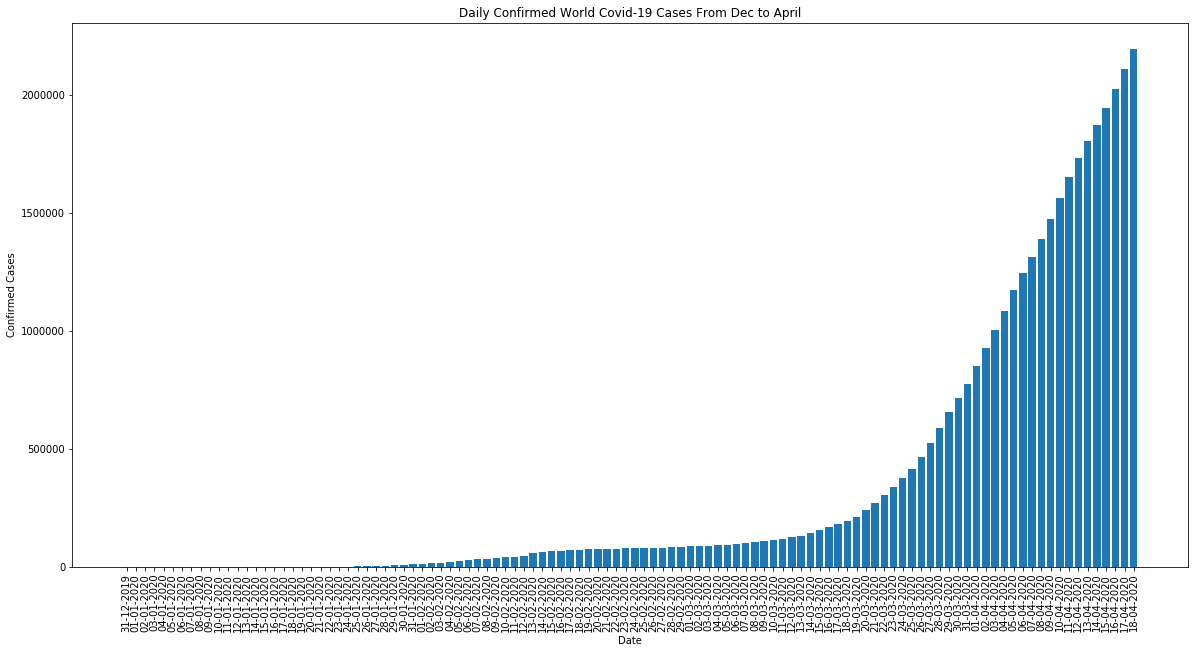

In [4]:
from pyspark.sql.types import *
from pyspark.sql.functions import unix_timestamp, from_unixtime
import matplotlib.pyplot as plt
import pandas
import numpy as np
global world, world_daily_plot

plt.rcParams["figure.figsize"] = (20,10)
df = spark.read.csv("total-cases-covid-19.csv", header = True) 
world = df.toDF('Country','Code','Date','TotalConfirmedCases').cache() 
world.createOrReplaceTempView("world")
world = world.withColumn("TotalConfirmedCases", world["TotalConfirmedCases"]\
             .cast(IntegerType())).orderBy("Date", ascending=False).filter("Country != 'World'")
world_daily_plot = world.groupBy("Date").sum("TotalConfirmedCases")\
                  .withColumnRenamed("sum(TotalConfirmedCases)","TotalConfirmedCases")\
                  .sort(unix_timestamp("Date", "dd-MM-yyyy"))
#world_daily_plot.show()
x = world_daily_plot.toPandas()["Date"].values.tolist()
y = world_daily_plot.toPandas()["TotalConfirmedCases"].values.tolist()
y_pos = np.arange(len(x))
plt.bar(y_pos, y)
plt.xticks(y_pos, x)
plt.xticks(rotation=90)
plt.title("Daily Confirmed World Covid-19 Cases From Dec to April")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.show()
#plt.savefig('Daily_Cases.png')

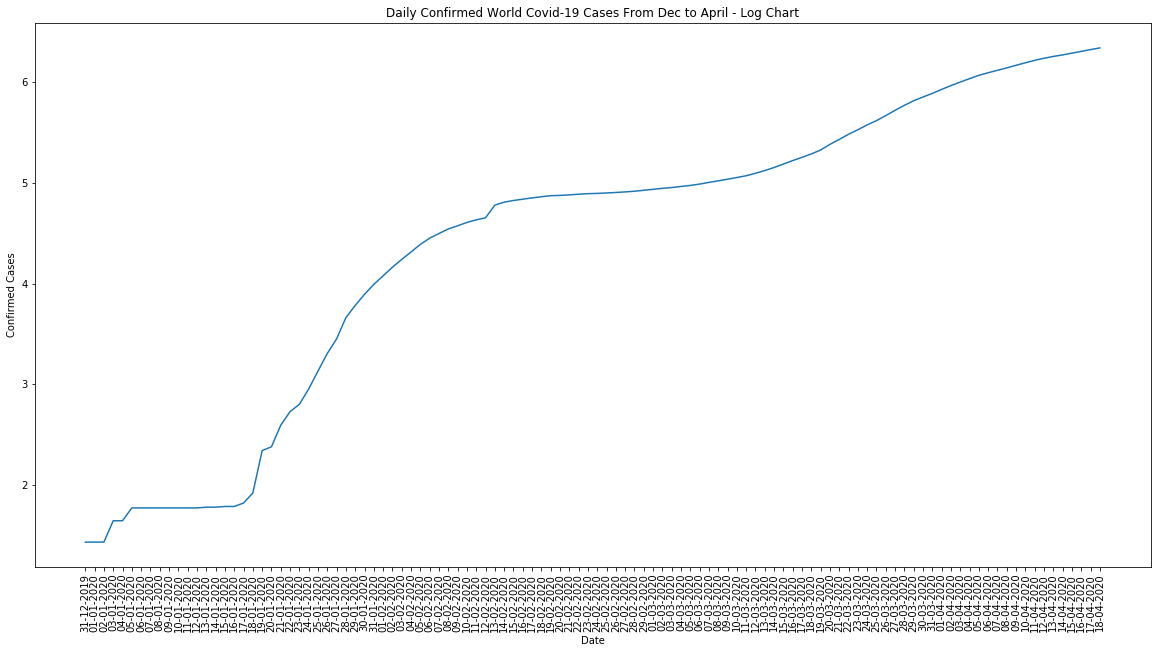

In [6]:
from math import log10
plt.rcParams["figure.figsize"] = (20,10)
x = world_daily_plot.toPandas()["Date"].values.tolist()
y = []
for number in (world_daily_plot.toPandas()["TotalConfirmedCases"].values.tolist()):
    y.append(log10(number))
y_pos = np.arange(len(x))
plt.plot(y_pos, y)
plt.xticks(y_pos, x)
plt.xticks(rotation=90)
plt.title("Daily Confirmed World Covid-19 Cases From Dec to April - Log Chart")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.show()

I am going to show a Dynamic map of the daily confirmed cases worldwide

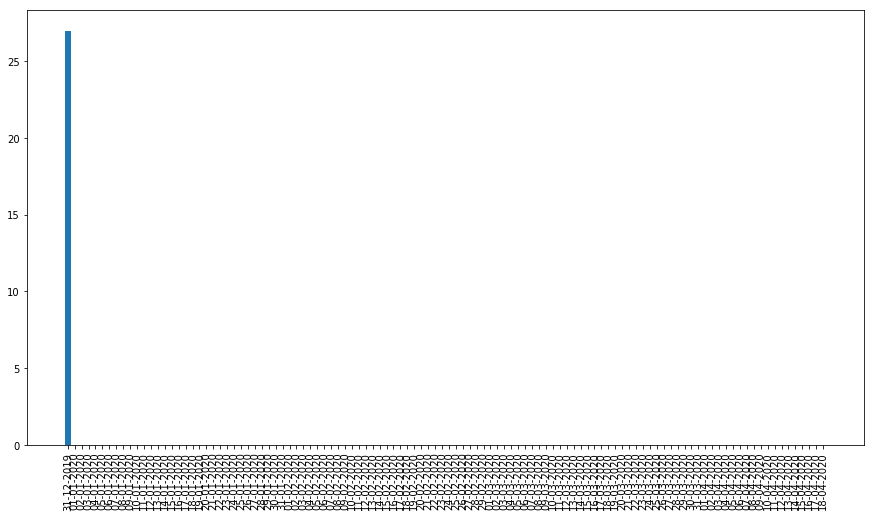

In [7]:
from IPython.display import HTML
import datetime
import pandas
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation
import numpy as np

df = world_daily_plot.toPandas()

current = "31-03-2020"


fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(code):
    ax.clear()
    x = world_daily_plot.toPandas()["Date"].values.tolist()
    y = world_daily_plot.toPandas()["TotalConfirmedCases"].values.tolist()
    current = y[code]
    i = 0
    y_values = []
    while i < len(y):
        y_values.append(0)
        i = i+1
    i = 0
    while i <= code:
        y_values[i] = y[i]
        i = i+1
    y_pos = np.arange(len(x))
    y_pos = y_pos
    ax.bar(y_pos, y_values)
    ax.set_xticks(y_pos)
    ax.set_xticklabels([x[i] for i in y_pos])
    plt.setp(ax.get_xticklabels(), rotation=90)

animator = animation.FuncAnimation(fig, draw_barchart, frames=range(0, 110))
HTML(animator.to_jshtml()) 
#draw_barchart(30)


#x_values = [datetime.datetime.strptime(d,"%d-%m-%Y").date() for d in xx]


#formatter = mdates.DateFormatter("%Y-%m-%d")
#ax.xaxis.set_major_formatter(formatter)
#locator = mdates.DayLocator()
#ax.xaxis.set_major_locator(locator)
#begin = datetime.datetime.strptime('02-04-2020',"%d-%m-%Y").date() 
#end = datetime.datetime.strptime('30-12-2019',"%d-%m-%Y").date() 



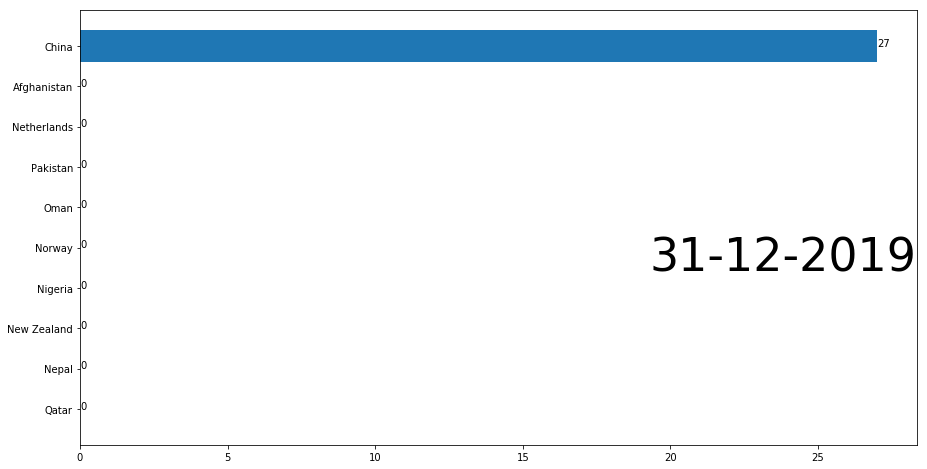

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
        
    
countries_daily_plot = world.select("Country", "Date", "TotalConfirmedCases")\
                            .sort(unix_timestamp("Date", "dd-MM-yyyy"))




#'{0}'".format(nname)
#countries_daily_plot.filter("Date = '31-03-2020'").orderBy("TotalConfirmedCases", ascending=False).show()

df = countries_daily_plot.toPandas()

current = "31-03-2020"

def code_to_date(code):
    date = datetime.datetime(2019,12,31)
    i = 0
    while i < code:
        date += datetime.timedelta(days=1)
        i = i+1
    return date.strftime("%d-%m-%Y")

fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(code):
    current = code_to_date(code)
    dff = (df[df['Date'].eq(current)]\
       .sort_values(by='TotalConfirmedCases', ascending=False)\
       .head(10))
    ax.clear()
    x = dff["Country"]
    y = dff["TotalConfirmedCases"]
    y_pos = np.arange(len(x))
    y_pos = y_pos[::-1]
    ax.barh(y_pos, y)
    ax.set_yticks(y_pos)
    ax.set_yticklabels([x.values.tolist()[i] for i in y_pos[::-1]])
    # iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
    for i, (value, name) in enumerate(zip(dff['TotalConfirmedCases'][::-1],dff['Country'][::-1])):
        if value > 5000:
            ax.text(value, i, name, ha='right')
            ax.text(value, i, value, ha='left')
        else:
            ax.text(value, i, value, ha='left')
    # Add year right middle portion of canvas
    ax.text(1, 0.4, current, transform=ax.transAxes, size=46, ha='right')

 
    

animator = animation.FuncAnimation(fig, draw_barchart, frames=range(0, 110))
HTML(animator.to_jshtml()) 



#draw_barchart(50)





Please type the date when you want worldwide covid-19 data:  31-03-2020


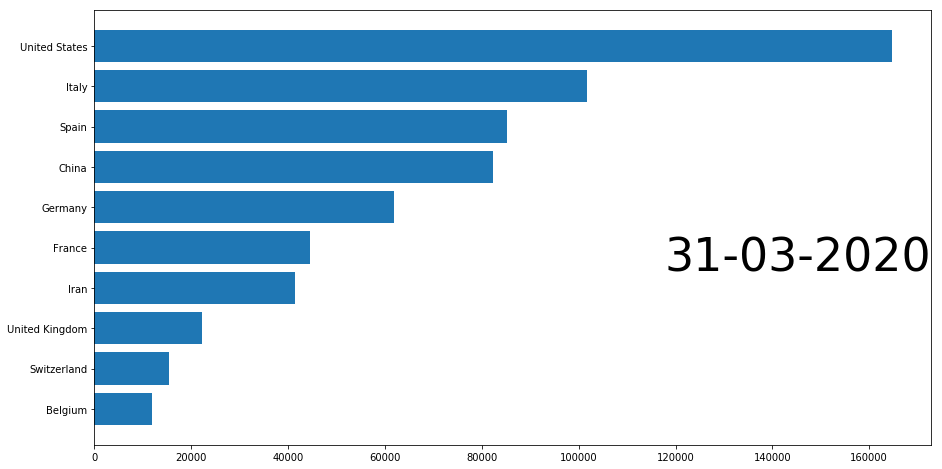

Please type the date when you want worldwide covid-19 data:  


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

        
    
#countries_daily_plot = world.select("Country", "Date", "TotalConfirmedCases")\
                            #.filter("Country != 'World'").sort(unix_timestamp("Date", "dd-MM-yyyy"))




#'{0}'".format(nname)
#countries_daily_plot.filter("Date = '31-03-2020'").orderBy("TotalConfirmedCases", ascending=False).show()

#df = countries_daily_plot.toPandas()

#current = "31-03-2020"

while True:
    q = input("Please type the date when you want worldwide covid-19 data:  ")
    if len(q) == 0:
        break
    else:
        current = q
        countries_daily_plot = world.select("Country", "Date", "TotalConfirmedCases")\
        .filter("Country != 'World'").sort(unix_timestamp("Date", "dd-MM-yyyy"))
        df = countries_daily_plot.toPandas()
        dff = (df[df['Date'].eq(current)]\
               .sort_values(by='TotalConfirmedCases', ascending=False)\
               .head(10))

        fig, ax = plt.subplots(figsize=(15, 8))
        x = dff["Country"]
        y = dff["TotalConfirmedCases"]
        y_pos = np.arange(len(x))
        y_pos = y_pos[::-1]
        ax.barh(y_pos, y)
        ax.set_yticks(y_pos)
        ax.set_yticklabels([x.values.tolist()[i] for i in y_pos[::-1]])
        ax.text(1, 0.4, current, transform=ax.transAxes, size=46, ha='right')
        plt.show()
    

#### Predition of Future Infections:
recovery time d = 17 days \
basic reproduction number R_0 = 3.28 \
death rate F =  5%\
incubation period i = 14 days 

In [15]:
from pyspark.sql.types import StructType
from pyspark.sql.types import StructField
from pyspark.sql.types import StringType

d = 17
R_0 = 2.2
F = 0.05
i = 5

t=100
m = []
k = 0
n = k + d
while k<= t:
    m.append(k)
    k = k+i
while n <= t:
    m.append(n)
    n = n+i
m.sort()
def update_model(model):
    final_model = []
    count = 0
    prev_new = 0
    prev_total = 0
    predi_total_cases = 0
    for m in model:
        day = m
        if day % i == 0:
            predi_cases = R_0**(day / i)
            predi_total_cases = predi_total_cases + predi_cases
            predi_new_deaths = prev_new
            predi_total_deaths = prev_total
        elif (day - d) % i == 0:
            predi_cases = 0
            predi_total_cases = predi_total_cases + predi_cases
            predi_new_deaths = (R_0**count) *F
            predi_total_deaths = prev_total + predi_new_deaths
            prev_new = predi_new_deaths
            prev_total = predi_total_deaths
            count += 1
        final_model.append((day, round(predi_cases,2),round(predi_total_cases,2)\
                            ,round(predi_new_deaths,2), round(predi_total_deaths,2)))
    return final_model
model = sc.parallelize(m)
model = model.map(lambda line: (0, line)).groupByKey().flatMap(lambda line: update_model(line[1]))
final_m =  model.map(lambda x: (x[0],x[1],x[2],x[3],x[4])).toDF(["Day", "Predicted Incident Cases" ,"Predicted Total Cases","Predicted New Deaths","Predicted Total Deaths"])
final_m = final_m.select("Day","Predicted Total Cases")
#final_m.show()
for item in model.collect():
    print(item)
print(len(model.collect()))

(0, 1.0, 1.0, 0, 0)
(5, 2.2, 3.2, 0, 0)
(10, 4.84, 8.04, 0, 0)
(15, 10.65, 18.69, 0, 0)
(17, 0, 18.69, 0.05, 0.05)
(20, 23.43, 42.11, 0.05, 0.05)
(22, 0, 42.11, 0.11, 0.16)
(25, 51.54, 93.65, 0.11, 0.16)
(27, 0, 93.65, 0.24, 0.4)
(30, 113.38, 207.03, 0.24, 0.4)
(32, 0, 207.03, 0.53, 0.93)
(35, 249.44, 456.47, 0.53, 0.93)
(37, 0, 456.47, 1.17, 2.11)
(40, 548.76, 1005.22, 1.17, 2.11)
(42, 0, 1005.22, 2.58, 4.68)
(45, 1207.27, 2212.49, 2.58, 4.68)
(47, 0, 2212.49, 5.67, 10.35)
(50, 2655.99, 4868.49, 5.67, 10.35)
(52, 0, 4868.49, 12.47, 22.82)
(55, 5843.18, 10711.67, 12.47, 22.82)
(57, 0, 10711.67, 27.44, 50.26)
(60, 12855.0, 23566.67, 27.44, 50.26)
(62, 0, 23566.67, 60.36, 110.62)
(65, 28281.01, 51847.68, 60.36, 110.62)
(67, 0, 51847.68, 132.8, 243.42)
(70, 62218.21, 114065.89, 132.8, 243.42)
(72, 0, 114065.89, 292.16, 535.58)
(75, 136880.07, 250945.96, 292.16, 535.58)
(77, 0, 250945.96, 642.75, 1178.33)
(80, 301136.15, 552082.11, 642.75, 1178.33)
(82, 0, 552082.11, 1414.05, 2592.38)
(85,

In [ ]:
from math import log10
df = final_m.toPandas()
x = df["Day"]
y= []
for number in df["Predicted Total Cases"]:
    y.append(log10(number))
y_pos = np.arange(len(x))
plt.plot(y_pos, y)
plt.xticks(y_pos, x)
plt.xticks(rotation=90)
plt.title("Daily Confirmed World Covid-19 Cases From Dec to April")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.show()